# Part 2: Neighborhood based Collaborative Filtering

For this project, we will only be looking into neighborhood-based collaborative filtering
methods. There are two basic principles used in this model, namely, user-based models, and
item-based models. In this project, we will only implement user-based collaborative filtering
(item-based is very similar to this).

Here are some of the notations:
* I_u : Set of item indices for which ratings have been specified by user u
* I_v : Set of item indices for which ratings have been specified by user v
* μ_u : Mean rating for user u computed using her specified ratings
* r_uk : Rating of user u for item k

For user-based neighborhood models, user-based neighborhoods are defined in order to identify
similar users to the target user, for whom the rating predictions are being made. Therefore, a
similarity function needs to be defined between the ratings specified by users.

For the purpose of our project, we will use the Pearson-correlation coefficient, denoted by
Pearson(u,v), to compute the similarity between users.

In [2]:
import pandas as pd
ratings = pd.read_csv('ratings.csv')

In [4]:
import os
if not os.path.exists('results/Q10-15'):

    os.makedirs('results/Q10-15')

In [5]:
from surprise import Dataset

from surprise import Reader

In [6]:
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

ratings = ratings.as_matrix()

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [7]:
import matplotlib.pyplot as plt

In [31]:
#Plotting function

def plot(k,metric_v,metric_name,type_data):

    x = range(2,k+2,2)

    plt.plot(x,metric_v)

    plt.xlabel("K")

    plt.ylabel("Average "+metric_name)

    plt.title("Average "+metric_name+" for k = "+str(k)+" for the "+type_data+" dataset")

    plt.savefig("Average "+metric_name+" for k = "+str(k)+" for the "+type_data+" dataset"+".png")
    plt.show()

    plt.close()

In [9]:
def popular_trim(array,dict):

    result = list()

    for i in range(0,len(array)):

        if(dict[array[i][1]] > 2):

            result.append(array[i])

    return result

In [10]:
def unpop_trim(array,dict):

        result = list()

        for i in range(0,len(array)):

            if(dict[array[i][1]] <= 2):

                result.append(array[i])

        return result

In [11]:
def high_var(array,dict,variance, map):

    result = list()

    for i in range(0,len(array)):

        if(dict[array[i][1]] > 5 and variance[map[array[i][1]]] >= 2):

            result.append(array[i])

    return result

In [12]:
q3 = dict()

for i in range(0,ratings.shape[0]):

    if(ratings[i][1] not in q3):

        q3[ratings[i][1]] = 1

    else:

        q3[ratings[i][1]] = q3[ratings[i][1]]+1

In [13]:
counter = 0

map = dict()

for i in range(0,ratings.shape[0]):

    if(ratings[i][1] not in map):

        map[ratings[i][1]] = counter

        counter = counter +1


In [14]:
import numpy as np

In [24]:
npdata = np.zeros((672,9750))

npdata[:] = np.nan

for i in range(0,ratings.shape[0]):

    npdata[ratings[i][0].astype(int)][map[ratings[i][1]]] = ratings[i][2]

In [25]:
q5 = np.square(np.nanstd(npdata,axis = 0))

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [26]:
import surprise

In [27]:
from surprise.model_selection import KFold

In [28]:
from surprise import accuracy

In [29]:
res_test_m = list()

res_test = list()

res_pop = list()

res_unpop = list()

res_high = list()

for k in range(2,102,2):

    kf = KFold(n_splits=10)

    temp_t_m = list()

    temp_t = list()

    temp_p = list()

    temp_u = list()

    temp_h = list()

    knn = surprise.prediction_algorithms.knns.KNNBasic(k=k, min_k=1, sim_options={'name': 'pearson'})

    for trainset, testset in kf.split(data):

        x = trainset

        knn.fit(trainset)

        pop_test = popular_trim(testset,q3)

        unpop_test = unpop_trim(testset,q3)

        high_test = high_var(testset,q3,q5,map)

        predictions = knn.test(testset)

        temp_t.append(accuracy.rmse(predictions, verbose=False))

        temp_t_m.append(accuracy.mae(predictions, verbose=False))

        predictions = knn.test(pop_test)

        temp_p.append(accuracy.rmse(predictions, verbose=False))

        predictions = knn.test(unpop_test)

        temp_u.append(accuracy.rmse(predictions, verbose=False))

        predictions = knn.test(high_test)

        temp_h.append(accuracy.rmse(predictions, verbose=False))

    res_test_m.append(np.average(temp_t_m))    

    res_test.append(np.average(temp_t))

    res_pop.append(np.average(temp_p))

    res_unpop.append(np.average(temp_u))

    res_high.append(np.average(temp_h))




Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

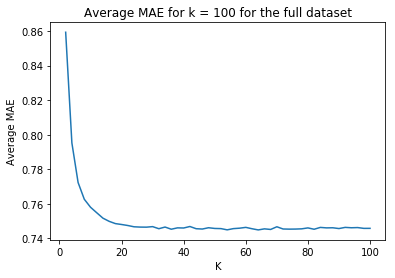

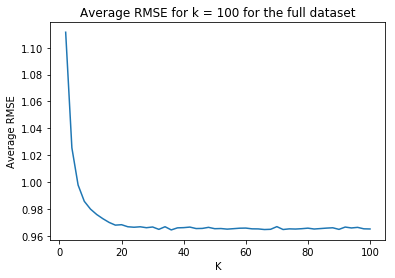

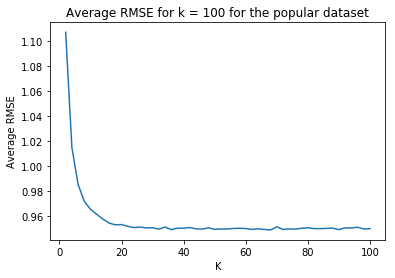

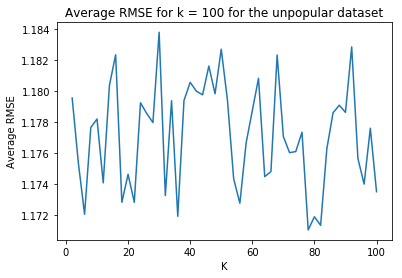

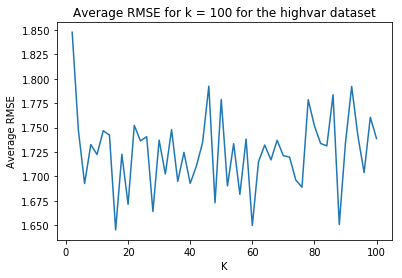

In [32]:
plot(100,res_test_m,"MAE","full")

plot(100,res_test,"RMSE","full")

plot(100,res_pop,"RMSE","popular")

plot(100,res_unpop,"RMSE","unpopular")

plot(100,res_high,"RMSE","highvar")